Healthcare dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\laura\\Downloads\\dataset\\healthcare-dataset-stroke-data.csv")

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1
248,43424,Female,78.0,0,0,Yes,Private,Rural,78.81,19.6,Unknown,1


In [4]:
# Values to be extracted and removed
values_to_extract = ['NaN', '--', 'null', 'NA', '','not reported','9999']

# Filtering and removing rows
for column in data.columns:
    data = data[~data[column].isin(values_to_extract)]

# Resetting the index
data.reset_index(drop=True, inplace=True)

print(data)

        id  gender   age  hypertension  heart_disease ever_married  \
0     9046    Male  67.0             0              1          Yes   
1    51676  Female  61.0             0              0          Yes   
2    31112    Male  80.0             0              1          Yes   
3    60182  Female  49.0             0              0          Yes   
4     1665  Female  79.0             1              0          Yes   
..     ...     ...   ...           ...            ...          ...   
245  49669  Female  14.0             0              0           No   
246  27153  Female  75.0             0              0          Yes   
247  34060    Male  71.0             1              0          Yes   
248  43424  Female  78.0             0              0          Yes   
249  30669    Male   3.0             0              0           No   

         work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          Private          Urban             228.69  36.6  formerly smoked   
1

In [5]:
data.count()

id                   250
gender               250
age                  250
hypertension         250
heart_disease        250
ever_married         250
work_type            250
Residence_type       250
avg_glucose_level    250
bmi                  210
smoking_status       250
stroke               250
dtype: int64

In [6]:
# Calculate the mean BMI value, here we calculate the mean of BMI to impute missing values in BMI
mean_bmi = data['bmi'].mean()

# Impute missing BMI values with the mean
data['bmi'].fillna(mean_bmi, inplace=True)

# Save the modified dataset
data.to_csv('imputed_dataset.csv', index=False)

In [7]:
data = pd.read_csv("imputed_dataset.csv")

In [8]:
data.count()  # the row count of all the columns are uniform

id                   250
gender               250
age                  250
hypertension         250
heart_disease        250
ever_married         250
work_type            250
Residence_type       250
avg_glucose_level    250
bmi                  250
smoking_status       250
stroke               250
dtype: int64

In [9]:
import pandas as pd

# Assuming 'df' is your DataFrame
numeric_df = data.applymap(pd.to_numeric, errors='coerce')  # Convert all values to numeric, ignoring errors

condition = numeric_df < 0.0001  # Applying the condition to all columns

# Iterate through each column in the DataFrame
for column_name in numeric_df.columns:
    # Calculate the mean and standard deviation
    mean = numeric_df.loc[condition[column_name], column_name].mean()
    std = numeric_df.loc[condition[column_name], column_name].std()

    # Define the outlier threshold
    threshold = 3 * std

    # Detect outliers
    outliers = numeric_df.loc[condition[column_name], column_name][(numeric_df.loc[condition[column_name], column_name] < mean - threshold) | (numeric_df.loc[condition[column_name], column_name] > mean + threshold)]

    data = data.drop(outliers.index)


In [10]:
data.count()

id                   250
gender               250
age                  250
hypertension         250
heart_disease        250
ever_married         250
work_type            250
Residence_type       250
avg_glucose_level    250
bmi                  250
smoking_status       250
stroke               250
dtype: int64

In [11]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.411905,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [12]:
unique_gender = data['gender'].unique()   # to determine unique values in the column gender
unique_gender

array(['Male', 'Female'], dtype=object)

In [13]:
unique_ever_married = data['ever_married'].unique() # to determine unique values in the column ever_married
unique_ever_married

array(['Yes', 'No'], dtype=object)

In [14]:
unique_work_type = data['work_type'].unique() # to determine the unique vqlues in the column work_type
unique_work_type

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [15]:
unique_Residence_type = data['Residence_type'].unique() # to determine the unique vqlues in the column residence_type
unique_Residence_type

array(['Urban', 'Rural'], dtype=object)

In [16]:
data = data[data['smoking_status'] != 'Unknown']

In [17]:
unique_smoking_status = data['smoking_status'].unique() # to determine the unique vqlues in the column smoking_status
unique_smoking_status

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

In [18]:
data = data.replace({'Male': 0, 'Female': 1}) 

In [19]:
data = data.replace({'No': 0, 'Yes': 1}) 

In [20]:
data = data.replace({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3 }) 

In [21]:
data = data.replace({'Urban': 0, 'Rural': 1}) 

In [22]:
data = data.replace({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2 }) 

In [23]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,0,228.69,36.600000,0,1
1,51676,1,61.0,0,0,1,1,1,202.21,30.411905,1,1
2,31112,0,80.0,0,1,1,0,1,105.92,32.500000,1,1
3,60182,1,49.0,0,0,1,0,0,171.23,34.400000,2,1
4,1665,1,79.0,1,0,1,1,1,174.12,24.000000,1,1


In [24]:
data = data.drop('id', axis=1)

In [25]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,0,228.69,36.600000,0,1
1,1,61.0,0,0,1,1,1,202.21,30.411905,1,1
2,0,80.0,0,1,1,0,1,105.92,32.500000,1,1
3,1,49.0,0,0,1,0,0,171.23,34.400000,2,1
4,1,79.0,1,0,1,1,1,174.12,24.000000,1,1


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the 'age' column to the range of 0 to 1
data['age'] = scaler.fit_transform(data[['age']])

# Round the scaled values to 2 decimal places
# data['Age_at_diagnosis'] = np.round(data['Age_at_diagnosis'], 2)

# Display the scaled 'age' column
# print(data['Age_at_diagnosis'])

data['avg_glucose_level'] = scaler.fit_transform(data[['avg_glucose_level']])

data['bmi'] = scaler.fit_transform(data[['bmi']])
# Round the scaled values to 2 decimal places
data['avg_glucose_level'] = np.round(data['avg_glucose_level'], 1)
data['bmi'] = np.round(data['bmi'], 1)

In [27]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.70,0,1,1,0,0,0.8,0.5,0,1
1,1,0.58,0,0,1,1,1,0.7,0.3,1,1
2,0,0.96,0,1,1,0,1,0.2,0.4,1,1
3,1,0.34,0,0,1,0,0,0.5,0.4,2,1
4,1,0.94,1,0,1,1,1,0.5,0.2,1,1


In [28]:
file_path = "healthdata.csv"

# Save the DataFrame to a file
data.to_csv(file_path, sep='\t', index=False)

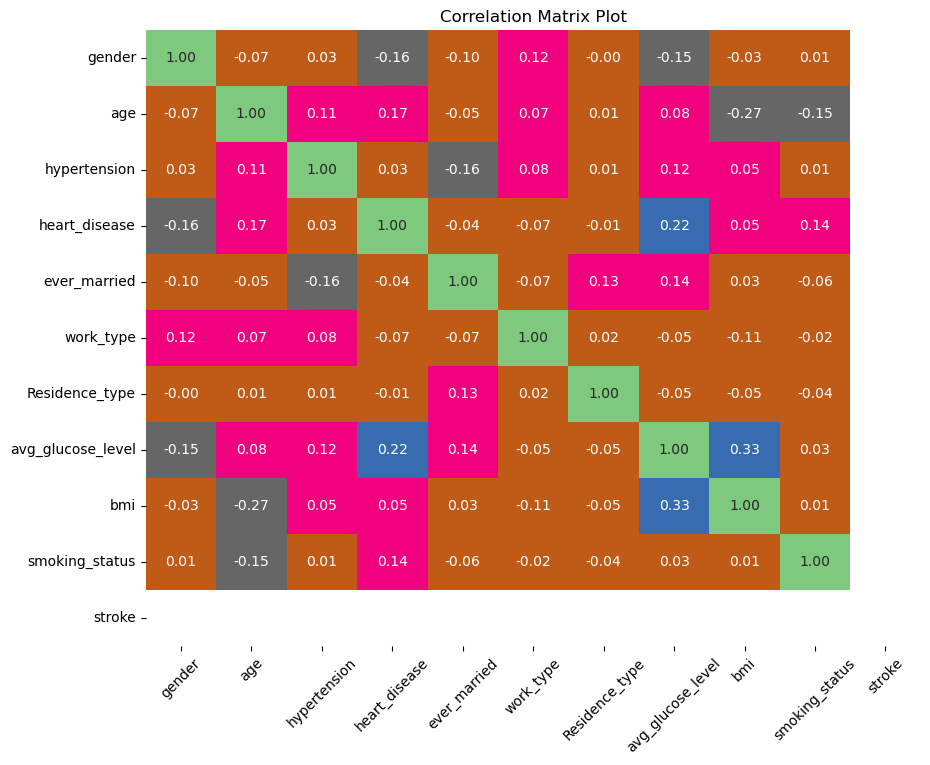

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Accent_r', cbar=False)

# Customize the plot
plt.title('Correlation Matrix Plot')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()

In [30]:
# machine learning 
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = data.drop('stroke', axis=1)  
y = data['stroke']

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (161, 10) (161,)
Test set shape: (41, 10) (41,)


In [31]:
# machine learning algorithms (3 models)

#Linear regression
#Logistic regression
#Decision Trees
#Support Vector Machines (SVM)
#Random Forests
#Naive Bayes
#KNN algorithm 
#gradient boosting

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Select the dependent variable (y) and independent variable(s) (X)
X = data['hypertension']
y = data['stroke']

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Mean Squared Error: {mse}')
#print(f'R-squared (R2): {r2}')

#plt.scatter(X_test, y_test, color='blue')
#plt.plot(X_test, y_pred, color='red', linewidth=2)
#plt.xlabel('hypertension')
#plt.ylabel('stroke')
#plt.title('Linear Regression')
#plt.show()

#print('Intercept (b0):', model.intercept_)
#print('Coefficients (b1, b2, ...):', model.coef_)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Select the features (X) and the target variable (y)
X = data['hypertension']  # Replace with your feature names
y = data['stroke']
# Create an SVM classifier (you can specify the kernel, e.g., 'linear', 'rbf', 'poly')
#model = SVC(kernel='linear')

# Fit the model to the training data
#model.fit(X_train, y_train)

# Make predictions on the test data
#y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

#print(f'Accuracy: {accuracy}')
#print(f'Classification Report:\n{report}')
#print(f'Confusion Matrix:\n{confusion}')

from sklearn.model_selection import GridSearchCV

#param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
#grid = GridSearchCV(SVC(), param_grid, cv=3)
#grid.fit(X_train, y_train)

#best_params = grid.best_params_
#best_model = grid.best_estimator_

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Select the features (X) and the target variable (y)
X = data['hypertension']  # Replace with your feature names
y = data['stroke']
# Create a K-NN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{confusion}')

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)

best_params = grid.best_params_
best_model = grid.best_estimator_

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Confusion Matrix:
[[41]]
